In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np

In [86]:
# Load dataset
df = pd.read_csv("Binary.csv")
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,target
0,-1.944044,1.891310,5.378017,-1.099764,0.319998,-0.107990,0.192998,-0.531588,-1.978358,0.505306,...,0.435838,-0.375777,-2.410484,1.307302,-0.447091,-1.205613,-0.758668,-1.115528,1.219782,1
1,0.548890,3.689146,-1.079215,-1.125497,6.892610,-0.114086,-0.129833,-4.471123,1.281707,2.509007,...,-0.515136,-1.814937,-0.659753,0.092014,1.173449,-0.887015,-0.657684,0.676340,0.379053,1
2,1.044743,2.804073,-1.779122,-0.358211,6.132624,-1.309396,-0.731316,-3.381683,-1.444734,3.028355,...,-0.928873,-1.592203,-0.389953,0.343527,0.740160,-0.244341,-1.337129,-0.168281,-0.464880,1
3,-2.848743,-2.220174,-0.498797,-0.054547,0.073406,0.927517,1.891807,-0.381548,0.017551,0.659493,...,0.662054,0.671306,-0.463003,-0.170516,0.249816,0.019505,-0.380889,-0.222127,0.364851,1
4,-0.715628,0.217362,2.032461,-0.144826,4.375660,-1.762026,1.335940,1.742721,-1.771379,0.819612,...,-0.428352,-0.511074,-0.346423,0.137622,-0.289325,-1.089344,-0.407556,-0.007071,0.117600,1


In [87]:
# Splitting features and target
X = df.drop(columns=['target'])  # Replace 'target' with actual target column name
y = df['target']

In [88]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KMeans - sklearn

In [90]:
#kmeans = KMeans(n_clusters=2, random_state=42)
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=42)
kmeans.fit(X_train)
predictions = kmeans.predict(X_test)
    
# Adjust cluster labels to match ground truth
if np.sum(predictions == y_test) < np.sum(predictions != y_test):
    predictions = 1 - predictions  # Invert labels if necessary
    
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
    
print("Final Centroids:", kmeans.cluster_centers_)
print("Cluster Assignments:", predictions)
print(f"Accuracy: {accuracy:.4f}")

Final Centroids: [[ 2.67556818e+00  6.61244003e-01  3.98264525e+00  7.17298186e+00
   2.08111898e+00 -2.10559052e-01 -3.37070283e+00  7.82904683e+00
   5.25980690e+00  8.39878793e+00  1.31615477e+01  3.75417402e+00
  -8.68466062e-01  2.47776047e+00 -3.59893623e+00 -1.35167049e+00
   1.15550951e-01  3.67429772e+00 -4.46952231e-01 -3.08029932e+00
   4.70145358e-01  1.97913941e+00 -3.10605766e-01 -9.46315665e-01
  -5.97352742e-01  1.66826641e-01  1.70210349e+00 -4.58176465e-01
  -7.56246975e-03]
 [-6.16490364e-03 -1.52360369e-03 -9.17660196e-03 -1.65276080e-02
  -4.79520503e-03  4.85159107e-04  7.76659638e-03 -1.80392784e-02
  -1.21193707e-02 -1.93520459e-02 -3.03261468e-02 -8.65017055e-03
   2.00107388e-03 -5.70912550e-03  8.29247980e-03  3.11444814e-03
  -2.66246430e-04 -8.46612378e-03  1.02984385e-03  7.09746387e-03
  -1.08328424e-03 -4.56022905e-03  7.15681488e-04  2.18045084e-03
   1.37638881e-03 -3.84393181e-04 -3.92189743e-03  1.05570614e-03
   1.74250455e-05]]
Cluster Assignments:

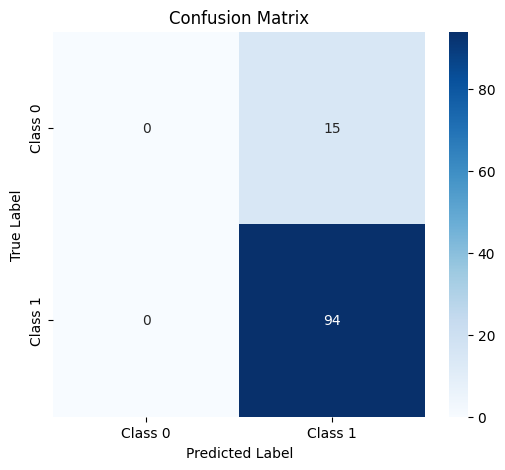

In [91]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

c:\Users\rajit\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\rajit\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


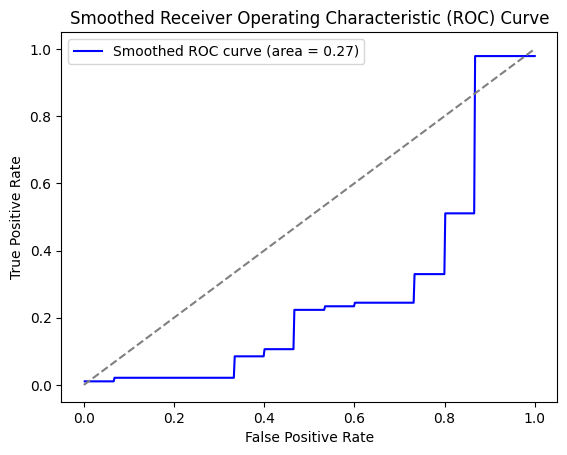

In [92]:
# Compute ROC curve
def predict_proba(X):
    distances = np.linalg.norm(X[:, np.newaxis] - kmeans.cluster_centers_, axis=2)
    inverted_distances = 1 / (1 + distances)
    smoothed_probs = inverted_distances / inverted_distances.sum(axis=1, keepdims=True)
    return smoothed_probs[:, 1]  # Probability of belonging to cluster 1

# ROC Curve with more thresholds
probs = predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
from scipy.interpolate import interp1d
x_smooth = np.linspace(0, 1, 500)  # Create finer points for smoothing
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Smoothed Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


KMeans - from Scratch

In [93]:
class KMeans:
    def __init__(self, n_clusters=2, max_iters=100, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        np.random.seed(self.random_state)
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else self.centroids[i] for i in range(self.n_clusters)])
            
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break
            
            self.centroids = new_centroids
        
        self.labels_ = labels
        return self

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def predict_proba(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        probs = 1 / (1 + distances)  # Inverse distance as pseudo-probability
        return probs[:, 1]  # Probability of belonging to cluster 1

Clustering Accuracy: 0.6147


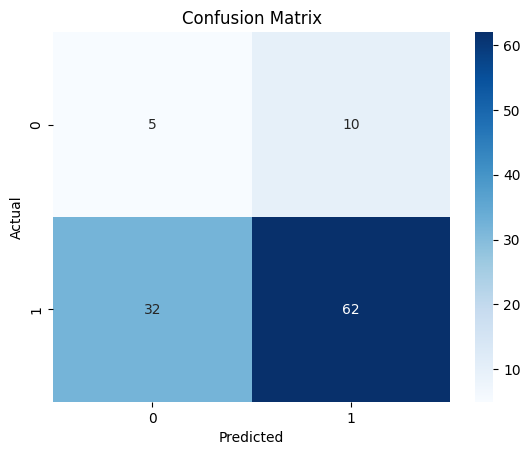

In [94]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
labels_train = kmeans.labels_
labels_test = kmeans.predict(X_test)
    
# Map cluster labels to actual target values for best accuracy
if accuracy_score(y_train, labels_train) < 0.5:
    labels_train = 1 - labels_train
    labels_test = 1 - labels_test

# Evaluate the clustering accuracy
accuracy = accuracy_score(y_test, labels_test)
print(f'Clustering Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, labels_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


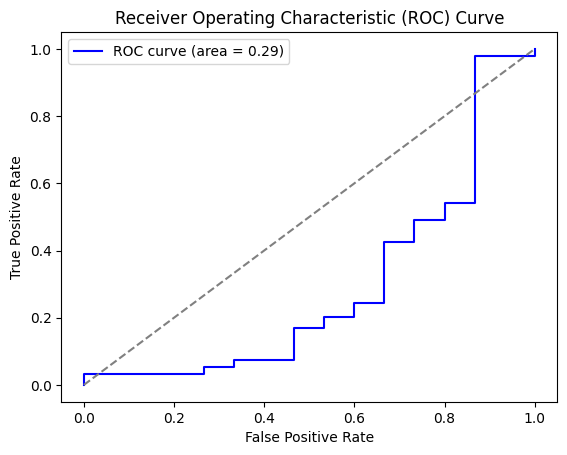

In [95]:
# ROC Curve
probs = kmeans.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()